In [1]:
import numpy as np
import pylab as plt
import networkx as nx

In [2]:
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

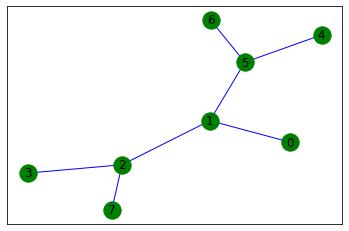

In [3]:
goal = 7
mapping = {0:'Start', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7-Destination'}
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G, k=.5, center=points_list[2])
nx.draw_networkx_nodes(G, pos, node_color='g')
nx.draw_networkx_edges(G, pos, edge_color='b')
nx.draw_networkx_labels(G, pos)
plt.show()

In [4]:
NO_OF_POINTS = 8

In [5]:
R = np.matrix(np.ones(shape=(NO_OF_POINTS, NO_OF_POINTS)))
R *= -1

In [6]:
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 150
    else:
        R[point] = 0
        
    if point[0] == goal:
        R[point[::-1]] = 150
    else:
        # reverse of point
        R[point[::-1]] = 0

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [7]:
R[goal,goal] = 150

In [8]:
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 150.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 150.]])

In [9]:
Q = np.matrix(np.zeros([NO_OF_POINTS, NO_OF_POINTS]))

# The learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index,size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)
    
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

In [10]:
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state, action, gamma)
    scores.append(score)
    print("Score: ", str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps =[current_state]

while current_state != 7:
    
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index,size = 1))
    else:
        next_step_index = int(next_step_index)
        
    steps.append(next_step_index)
    current_state = next_step_index

max_value 0.0
Score:  0
max_value 0.0
Score:  0
max_value 150.0
Score:  100.0
max_value 0.0
Score:  100.0
max_value 0.0
Score:  100.0
max_value 120.0
Score:  180.0
max_value 96.0
Score:  244.0
max_value 120.0
Score:  324.0
max_value 120.0
Score:  404.0
max_value 0.0
Score:  404.0
max_value 0.0
Score:  404.0
max_value 0.0
Score:  404.0
max_value 0.0
Score:  404.0
max_value 120.0
Score:  404.0
max_value 0.0
Score:  404.0
max_value 96.0
Score:  404.0
max_value 96.0
Score:  404.0
max_value 120.0
Score:  404.0
max_value 120.0
Score:  404.0
max_value 246.0
Score:  346.3414634146342
max_value 120.0
Score:  346.3414634146342
max_value 96.0
Score:  346.3414634146342
max_value 346.8
Score:  274.74048442906576
max_value 0.0
Score:  274.74048442906576
max_value 427.44
Score:  241.77428411005053
max_value 0.0
Score:  241.77428411005053
max_value 0.0
Score:  241.77428411005053
max_value 120.0
Score:  241.77428411005053
max_value 96.0
Score:  241.77428411005053
max_value 0.0
Score:  241.7742841100505

Score:  981.9725001131322
max_value 479.5008625761602
Score:  982.0685279432009
max_value 749.2200977752503
Score:  982.0685279432009
max_value 749.2200977752503
Score:  982.0945517453875
max_value 306.4200977752503
Score:  982.0945517453875
max_value 383.6006900609282
Score:  982.1713740094424
max_value 306.4200977752503
Score:  982.2705897552789
max_value 479.5008625761602
Score:  982.2705897552789
max_value 383.6006900609282
Score:  982.3474120193339
max_value 479.5008625761602
Score:  982.3474120193339
max_value 306.8805520487426
Score:  982.4088698305777
max_value 479.5008625761602
Score:  982.4088698305777
max_value 599.3760782202003
Score:  982.4088698305777
max_value 599.3760782202003
Score:  982.4088698305777
max_value 599.3760782202003
Score:  982.4088698305777
max_value 306.8805520487426
Score:  982.4703276418217
max_value 383.6006900609282
Score:  982.4703276418217
max_value 749.3760782202003
Score:  982.2866440170552
max_value 479.5008625761602
Score:  982.2866440170552
ma

Most efficient path:
[0, 1, 2, 7]


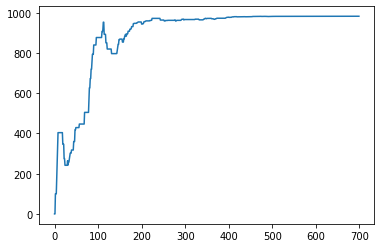

In [11]:
print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()